# Simulacion del grado de propagacion de la Covid-19 Ecuador

Para realizar esta  simulacion se utilizar la libreria pygame para ello se debe instalar pygame

conda install -c cogsci pygame.


## Introduccion

En una epidemia, el parámetro fundamental, del que todo depende, es R0. Este símbolo se refiere al número de personas que, de media, cada infectado contagia antes de convertirse en inofensivo ( bien porque está en aislamiento, hospitalizado o ha muerto).
El valor R0 es fundamental, porque si es grande, el contagio se alarga más rápidamente. Si R0 es 2, y si el tiempo medio en el que se permanece contagiados es una semana, y hay 1.000 infectados, entonces después de una semana los infectados será 3.000 (los 1.000 del inicio más 2.000 nuevos contagiados). 
Si R0 es 5, después de una semana los infectados será 6.000 (los 1.000 de partida más 5.000 nuevos contagiados). A este punto, el ciclo vuelve a partir, con más o menos retraso, dependiendo de cuánto tiempo un nuevo infectado emplea en convertirse a sí mismo en contagioso.

Se reconstruye la dinámica de transmisión de una enfermedad inventada con cuatro escenarios diversos: 1. Sin ninguna medida de contención; 2. Con la cuarentena absoluta, aunque se «escapa» algún infectado; 3. Con formas de aislamiento y la distancia de seguridad entre personas que permiten salir solo a un ciudadano de cada cuatro; 4. Si sale solamente un ciudadano de cada ocho. En definitiva, solo con el aislamiento se puede contener la epidemia y lograr que la respuesta sanitaria sea eficaz. https://www.washingtonpost.com/graphics/2020/world/corona-simulator/

Entonces, el número reproductivo (R0): Este valor representa el número promedio de personas que un individuo infectado puede contagiar. Para el COVID-19, se estima que se encuentra entre 1.4 y 4 (Qun Li, 2020). Ademas segun  estimaciones de la OMS la probabilidad de fallecimiento es de 1.2% - 4.2%  segun https://www.thelancet.com/journals/laninf/article/PIIS1473-3099(20)30243-7/fulltext




In [1]:
from random import randrange
import pygame

#Parametros de inicio
PROBA_MUERTE = 4.2  # Probabilidad de que la gente muera COVID
CONTAGION_RATE = 2.5  # Factor R0 para la simulacion COVID probabilidad
PROBA_INFECT = CONTAGION_RATE * 10
PROBA_VACU = 0 # Probabilidad de que exista una vacuna, COVID = 0
SIMULACION_SPEED = 25 # Tiempo de un dia en milisegundos
nb_rows = 50 #Numero de filas
nb_cols = 50 #Numero de columnas

global display, myfont, states, states_temp

WHITE = (255, 255, 255)
BLUE = (0, 0, 255)
GREEN = (0, 247, 0)
BLACK = (0, 0, 0)

def get_vecinos(x, y):
    incx = randrange(3)
    incy = randrange(3)
    incx = (incx * 1) - 1
    incy = (incy * 1) - 1
    x2 = x + incx
    y2 = y + incy
    if x2 < 0:
        x2 = 0
    if x2 >= nb_cols:
        x2 = nb_cols - 1
    if y2 < 0:
        y2 = 0
    if y2 >= nb_rows:
        y2 = nb_rows - 1
    return [x2, y2]

def vacunar():
    for x in range(nb_cols):
        for y in range(nb_rows):
            if randrange(99) < PROBA_VACU:
                states[x][y] = 1

def contar_muertes():
    contador = 0
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == -1:
                contador +=  1
    return contador

#Definimos datos de inicio
states = [[0] * nb_cols for i1 in range(nb_rows)]
states_temp = [[0] * nb_cols for i1 in range(nb_rows)]
states_temp = states.copy()
states[25][25] = 10
it = 0 # Iteraciones
total_muerte = 0
vacunar()
    

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html



En concecuencia, generar 5 simulaciones: 
1. R0 obtenidos de la prediccion del SIR (Trabajo anterior)
2. Predecir que va a ocurrir la proxima semana.
3. El valor 4, el cual representaría el peor de los casos. 
4. El valor 1.4 en el mejor de los casos
5. R0 sin las medidas tomadas


Finalmente, agregar el numero de dias transcurridos, personas recuperadas y generar la curva SIR de las simulaciones.


Plantee y realize mejoras al modelo de simulacion.

### 1. R0 obtenidos de la prediccion del SIR (Trabajo anterior).

In [2]:
#Implementar

CONTAGION_RATE = 5

pygame.init()
pygame.font.init()
display=pygame.display.set_mode((800,750),0,32)
pygame.display.set_caption("Simulacion de Epidemia Covid-19 Ecuador")
font=pygame.font.SysFont('Calibri', 40)
display.fill(WHITE)

while True:
    pygame.time.delay(SIMULACION_SPEED)
    it = it + 1
    if it <= 10000 and it >= 2:
        states_temp = states.copy()
        for x in range(nb_cols):
            for y in range(nb_rows):
                state = states[x][y]
                if state == -1:
                    pass
                if state >= 10:
                    states_temp[x][y] = state + 1
                if state >= 20:
                    if randrange(99) < PROBA_MUERTE:
                        states_temp[x][y] = -1
                    else:
                        states_temp[x][y] = 1
                if state >= 10 and state <= 20:
                    if randrange(99) < PROBA_INFECT:
                        neighbour = get_vecinos(x, y)
                        x2 = neighbour[0]
                        y2 = neighbour[1]
                        neigh_state = states[x2][y2]
                        if neigh_state == 0:
                            states_temp[x2][y2] = 10
        states = states_temp.copy()
        total_muerte = contar_muertes()
        
    pygame.draw.rect(display, WHITE, (250, 30, 260, 50))
    textsurface = font.render("Total muertes: "+ str(total_muerte), False, (255,160,122))
    display.blit(textsurface, (30, 30))

    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == 0:
                color = BLUE
            if states[x][y] == 1:
                color = GREEN
            if states[x][y] >= 10:
                color = (states[x][y] * 12, 50, 50)
            if states[x][y] == -1:
                color = BLACK
            pygame.draw.circle(display, color, (100 + x * 12 + 5, 100 + y * 12 + 5), 5)
            pygame.draw.rect(display, WHITE, (100 + x * 12 + 3, 100 + y * 12 + 4, 1, 1))

    for event in pygame.event.get():
        if event.type == pygame.KEYDOWN and event.key == pygame.K_ESCAPE:
            pygame.quit()
        if event.type == pygame.KEYDOWN and event.key == pygame.K_SPACE:
            #Reiniciamos valores
            states = [[0] * nb_cols for i1 in range(nb_rows)]
            states_temp = [[0] * nb_cols for i1 in range(nb_rows)]
            states_temp = states.copy()
            states[50][50] = 10
            it = 0
            total_muerte = 0
            vacunar()
            
    pygame.display.update()

5


error: video system not initialized

#### Captura de la simulacion con R0 = 5 :  

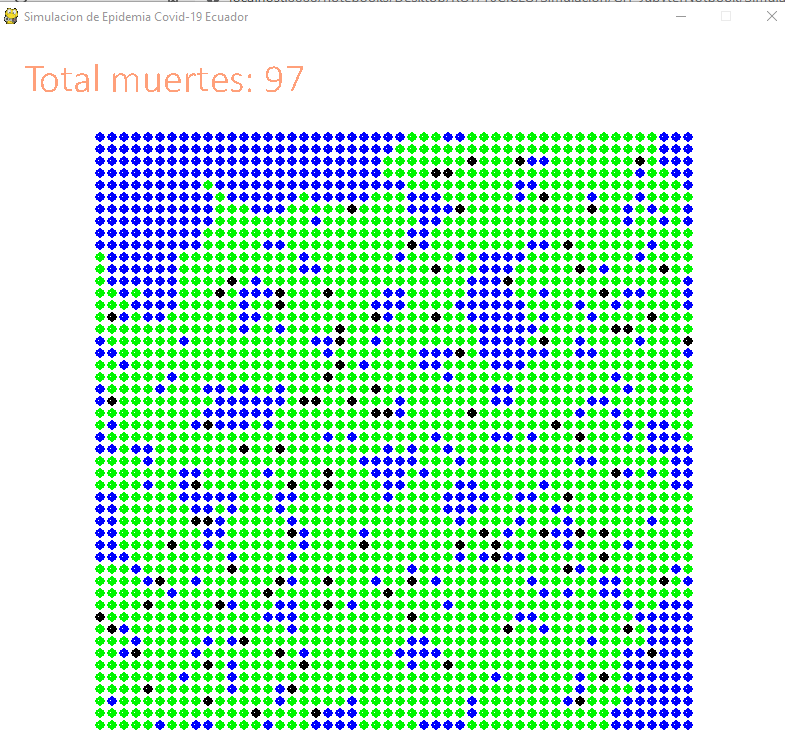  

### 2. Predecir que va a ocurrir la proxima semana.

### 3. El valor 4, el cual representaría el peor de los casos.

In [ ]:
PROBA_MUERTE = 4

CONTAGION_RATE = 5


pygame.init()
pygame.font.init()
display=pygame.display.set_mode((800,750),0,32)
pygame.display.set_caption("Simulacion de Epidemia Covid-19 Ecuador")
font=pygame.font.SysFont('Calibri', 40)
display.fill(WHITE)

while True:
    pygame.time.delay(SIMULACION_SPEED)
    it = it + 1
    if it <= 10000 and it >= 2:
        states_temp = states.copy()
        for x in range(nb_cols):
            for y in range(nb_rows):
                state = states[x][y]
                if state == -1:
                    pass
                if state >= 10:
                    states_temp[x][y] = state + 1
                if state >= 20:
                    if randrange(99) < PROBA_MUERTE:
                        states_temp[x][y] = -1
                    else:
                        states_temp[x][y] = 1
                if state >= 10 and state <= 20:
                    if randrange(99) < PROBA_INFECT:
                        neighbour = get_vecinos(x, y)
                        x2 = neighbour[0]
                        y2 = neighbour[1]
                        neigh_state = states[x2][y2]
                        if neigh_state == 0:
                            states_temp[x2][y2] = 10
        states = states_temp.copy()
        total_muerte = contar_muertes()
        
    pygame.draw.rect(display, WHITE, (250, 30, 260, 50))
    textsurface = font.render("Total muertes: "+ str(total_muerte), False, (255,160,122))
    display.blit(textsurface, (30, 30))

    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == 0:
                color = BLUE
            if states[x][y] == 1:
                color = GREEN
            if states[x][y] >= 10:
                color = (states[x][y] * 12, 50, 50)
            if states[x][y] == -1:
                color = BLACK
            pygame.draw.circle(display, color, (100 + x * 12 + 5, 100 + y * 12 + 5), 5)
            pygame.draw.rect(display, WHITE, (100 + x * 12 + 3, 100 + y * 12 + 4, 1, 1))

    for event in pygame.event.get():
        if event.type == pygame.KEYDOWN and event.key == pygame.K_ESCAPE:
            pygame.quit()
        if event.type == pygame.KEYDOWN and event.key == pygame.K_SPACE:
            #Reiniciamos valores
            states = [[0] * nb_cols for i1 in range(nb_rows)]
            states_temp = [[0] * nb_cols for i1 in range(nb_rows)]
            states_temp = states.copy()
            states[50][50] = 10
            it = 0
            total_muerte = 0
            vacunar()
            
    pygame.display.update()

4
5
5


#### Captura de la simulacion con el valor de mortalidad = 4:  

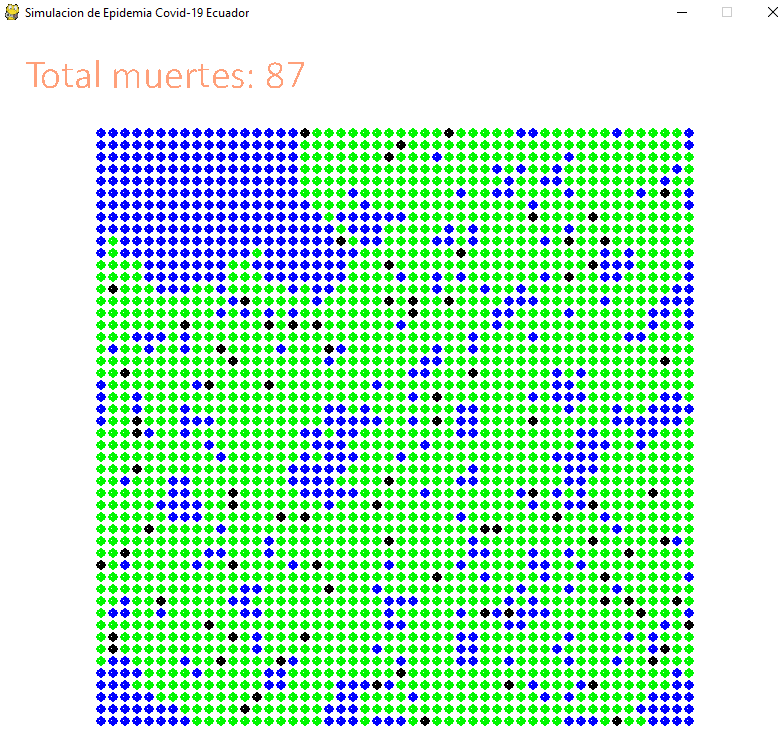  


### 4. El valor 1.4 en el mejor de los casos.

In [2]:
PROBA_MUERTE = 1.4

CONTAGION_RATE = 5


pygame.init()
pygame.font.init()
display=pygame.display.set_mode((800,750),0,32)
pygame.display.set_caption("Simulacion de Epidemia Covid-19 Ecuador")
font=pygame.font.SysFont('Calibri', 40)
display.fill(WHITE)

while True:
    pygame.time.delay(SIMULACION_SPEED)
    it = it + 1
    if it <= 10000 and it >= 2:
        states_temp = states.copy()
        for x in range(nb_cols):
            for y in range(nb_rows):
                state = states[x][y]
                if state == -1:
                    pass
                if state >= 10:
                    states_temp[x][y] = state + 1
                if state >= 20:
                    if randrange(99) < PROBA_MUERTE:
                        states_temp[x][y] = -1
                    else:
                        states_temp[x][y] = 1
                if state >= 10 and state <= 20:
                    if randrange(99) < PROBA_INFECT:
                        neighbour = get_vecinos(x, y)
                        x2 = neighbour[0]
                        y2 = neighbour[1]
                        neigh_state = states[x2][y2]
                        if neigh_state == 0:
                            states_temp[x2][y2] = 10
        states = states_temp.copy()
        total_muerte = contar_muertes()
        
    pygame.draw.rect(display, WHITE, (250, 30, 260, 50))
    textsurface = font.render("Total muertes: "+ str(total_muerte), False, (255,160,122))
    display.blit(textsurface, (30, 30))

    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == 0:
                color = BLUE
            if states[x][y] == 1:
                color = GREEN
            if states[x][y] >= 10:
                color = (states[x][y] * 12, 50, 50)
            if states[x][y] == -1:
                color = BLACK
            pygame.draw.circle(display, color, (100 + x * 12 + 5, 100 + y * 12 + 5), 5)
            pygame.draw.rect(display, WHITE, (100 + x * 12 + 3, 100 + y * 12 + 4, 1, 1))

    for event in pygame.event.get():
        if event.type == pygame.KEYDOWN and event.key == pygame.K_ESCAPE:
            pygame.quit()
        if event.type == pygame.KEYDOWN and event.key == pygame.K_SPACE:
            #Reiniciamos valores
            states = [[0] * nb_cols for i1 in range(nb_rows)]
            states_temp = [[0] * nb_cols for i1 in range(nb_rows)]
            states_temp = states.copy()
            states[50][50] = 10
            it = 0
            total_muerte = 0
            vacunar()
            
    pygame.display.update()

error: video system not initialized

#### Captura de la simulacion con el valor de mortalidad = 1.4:  

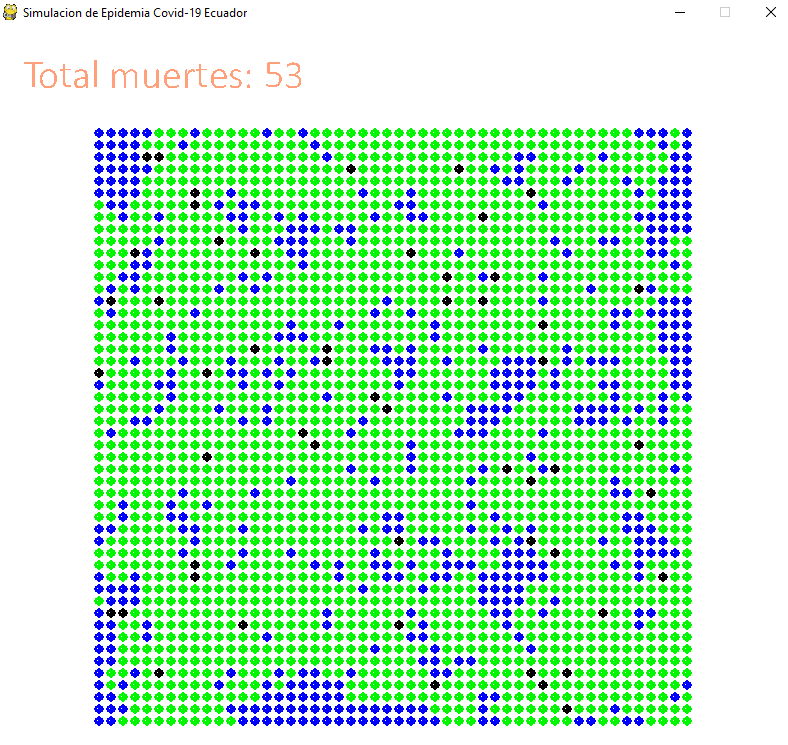  

### 5. R0 con las medidas realizadas por el ecuador de aqui a una semana.

 beta=0.40000000, gamma=0.05431698, R0 =7.36417933


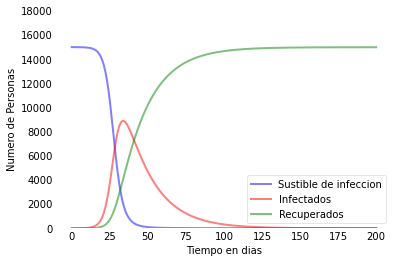

In [19]:
import pandas as pd
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from datetime import datetime,timedelta
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#Total de la poblacion 17472638
N = 15000
# Numero Inicial de Infectados
I0 = 1
# Numero de Recuperados
R0 = 0
# Todos los demás, S0, son susceptibles a la infección inicialmente.
S0 = N - I0 - R0

url = 'https://covid.ourworldindata.org/data/ecdc/full_data.csv'
df = pd.read_csv(url)
df = df[df['location'].isin(['Ecuador'])] #Filtro la Informacion solo para Ecuador
df = df[(df.date >= '2020-03-12') & (df.total_cases >= 1)]
df = df.loc[:,['date', 'total_cases' ]] #Selecciono las columnas de analasis
data = df


def errorCuadratico(point, data, S0, I0, R0):

    size = len(data)
    beta, gamma = point

    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/N, beta*S*I/N-gamma*I, gamma*I]
    
    solution = solve_ivp(SIR, [0, size], [S0,I0,R0], t_eval=np.arange(0, size, 1), vectorized=True)
    return np.sqrt(np.mean((solution.y[1] - data)**2))

optimo = minimize(
            errorCuadratico,
            [0.001, 0.001],
            args=(data.total_cases, S0, I0, R0),
            method='L-BFGS-B',
            bounds=[(0.00000001, 0.4), (0.00000001, 0.4)]
        )

beta, gamma = optimo.x

print(f" beta={beta:.8f}, gamma={gamma:.8f}, R0 ={beta/gamma:.8f}")

t = np.linspace(0, 200, 200)

def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N 
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Vector de condiciones iniciales
y0 = S0, I0, R0
# Integre las ecuaciones SIR en la cuadrícula de tiempo, t. A traves de la funcion odeint()
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T # Obtenicion de resultados


#  Trace los datos en tres curvas separadas para S (t), I (t) y R (t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Sustible de infeccion')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infectados')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recuperados')
ax.set_xlabel('Tiempo en dias')
ax.set_ylabel('Numero de Personas')
ax.set_ylim(0,N*1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()


## Analisis  

Mediante la siguiente practica de simulacion utilizando el modulo **pygame** se pudo observar que con el R0 obtenido en la practica anterior los casos de contagio y de muertes son un poco altos, pero si se varia con los datos de la tasa de mortalidad considerando el peor de los casos las muertes aumentan, y en el mejor de los casos las muertes disminuyen pero en ninguni de los dos casos es un cambio exagerado ya que R0 es un valor alto y por ello siempre existira un numero alto de contagiados.
## Conclusiones  

En conclucion podria decir que esta practica nos ayuda mucho a entender la importancia de las herramientas al momento de analizar datos mediante una simulacion, en este caso se uso el lenguaje de **python** y el modulo de **pygame** para la realizacion de la practia.  

## Opinion 

Luego de ralizar practicas de simulacion basados en la crisis que estamos pasando pudo observar tanto este estado como otros en general, no estan proporcionando datos correctos de como realmente esta afectando esta pandemia a los paises.

# Referencias
- http://code.intef.es/simulamos-una-epidemia-virica/
- 